In [ ]:
# %% [markdown]
# ## 🚀 SFO 프로젝트 [4/4] - 저장된 모델 로드 및 SHAP 분석 (IPYNB 출력)
#
# - **전처리 완료된 CSV 파일 로드**
# - **학습된 모델(.pkl) 파일 로드**
# - **데이터 분할 (X_val 재생성)**
# - **SHAP 분석 수행 (플롯 저장 + IPYNB 인라인 출력)**
#
# **[시작 전 준비사항]**
# 1. 모델 파일 (`baseline_lightgbm_model.pkl`)
# 2. 전처리된 CSV 파일 (`baseline_processed.csv`)
# 3. 라이브러리 설치: `pip install pandas joblib lightgbm shap matplotlib ipython`
#

# %%
import pandas as pd
import numpy as np
import os
import joblib # 모델 로드용
import lightgbm as lgb # joblib이 모델 구조를 이해하기 위해 필요
import matplotlib.pyplot as plt
import shap
from IPython.display import display # ⭐️ Force Plot을 IPYNB에 출력하기 위해 필요

# --- 1. 설정 및 파일 경로 정의 ---
print("\n--- [1. 파일 경로 설정] ---")

PROCESSED_DATA_PATH = 'baseline_processed.csv' ##여기수정하세요!!
MODEL_PATH = 'baseline_lightgbm_model.pkl' ##여기수정하세요!!

SHAP_BAR_PATH = 'image/shap_summary_bar.png'
SHAP_BEESWARM_PATH = 'image/shap_summary_beeswarm.png'
SHAP_FORCE_HTML_PATH = 'image/shap_force_plot_instance_0.html' # HTML 저장 경로

target_column = 'T일 예정 수주량'
features_to_exclude_from_X = ['Date', target_column, 'Product_Number']
train_ratio = 0.8

# ⭐️ SHAP의 JavaScript 라이브러리를 노트북에 로드 (HTML 플롯 표시에 필수)
print("SHAP JavaScript 라이브러리 초기화...")
shap.initjs()


--- [1. 파일 경로 설정] ---
SHAP JavaScript 라이브러리 초기화...


In [35]:
# --- 유틸리티 함수 ---
def set_display_options():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("Pandas display options have been set.")

def set_korean_font():
    import matplotlib.font_manager as fm
    font_path = None
    for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
        if 'malgun' in font.lower():
            font_path = font
            break
        elif 'nanumgothic' in font.lower():
            font_path = font
            break
    if font_path:
        font_name = fm.FontProperties(fname=font_path).get_name()
        plt.rcParams['font.family'] = font_name
        plt.rcParams['axes.unicode_minus'] = False
        print(f"Matplotlib 한글 폰트 '{font_name}' 설정 완료.")
    else:
        print("경고: 시스템에 한글 폰트를 찾을 수 없습니다. 기본 폰트가 사용됩니다.")

# 환경 설정 적용
set_display_options()
set_korean_font()

Pandas display options have been set.
Matplotlib 한글 폰트 'Malgun Gothic' 설정 완료.


In [36]:
# --- 2. 모델 및 데이터 로드 ---
print("\n--- [2. 모델 및 데이터 로드] ---")
final_model = None
X_val = None

try:
    # 2.1. 모델 로드
    if not os.path.exists(MODEL_PATH):
        raise FileNotFoundError(f"🚨 모델 파일 '{MODEL_PATH}'을(를) 찾을 수 없습니다.")
    
    final_model = joblib.load(MODEL_PATH)
    print(f"✅ 모델 로드 완료: '{MODEL_PATH}'")
    
    # ▼▼▼▼▼ [수정된 부분] ▼▼▼▼▼
    # 모델 파일이 None을 담고 있는지 즉시 확인
    if final_model is None:
        raise ValueError(f"🚨 치명적 오류: '{MODEL_PATH}' 파일이 비어있거나(None) 손상되었습니다. \n   모델 학습 스크립트(02_...)를 다시 실행하여 유효한 모델 파일을 생성해야 합니다.")
    # ▲▲▲▲▲ [수정된 부분] ▲▲▲▲▲

    # 2.2. 데이터 로드
    if not os.path.exists(PROCESSED_DATA_PATH):
        raise FileNotFoundError(f"🚨 데이터 파일 '{PROCESSED_DATA_PATH}'을(를) 찾을 수 없습니다.")
    
    # 이전에 수정한 'utf-8-sig' 또는 'cp949' 등 올바른 인코딩 사용
    df_manual_features_encoded = pd.read_csv(PROCESSED_DATA_PATH, encoding='utf-8-sig') 
    
    df_manual_features_encoded['Date'] = pd.to_datetime(df_manual_features_encoded['Date'])
    df_manual_features_encoded = df_manual_features_encoded.sort_values(by='Date')
    print(f"✅ 전처리된 데이터 로드 완료 (shape: {df_manual_features_encoded.shape})")

except Exception as e:
    print(f"🚨 2단계 로드 중 오류: {e}")
    df_manual_features_encoded = None
    final_model = None


--- [2. 모델 및 데이터 로드] ---
✅ 모델 로드 완료: 'C:/portfolio/SFO/data/baseline_lightgbm_model.pkl'
✅ 전처리된 데이터 로드 완료 (shape: (10624, 19))



--- [3. X_val 데이터셋 재생성] ---
✅ X_val 재생성 완료 (shape: (2125, 16))

--- [4. SHAP 분석 시작] ---
   - SHAP TreeExplainer 생성 중...
   - SHAP 값 계산 중 (X_val)...
   - SHAP 값 계산 완료.
   - SHAP Bar Plot 표시 및 저장 중 -> image/shap_summary_bar.png


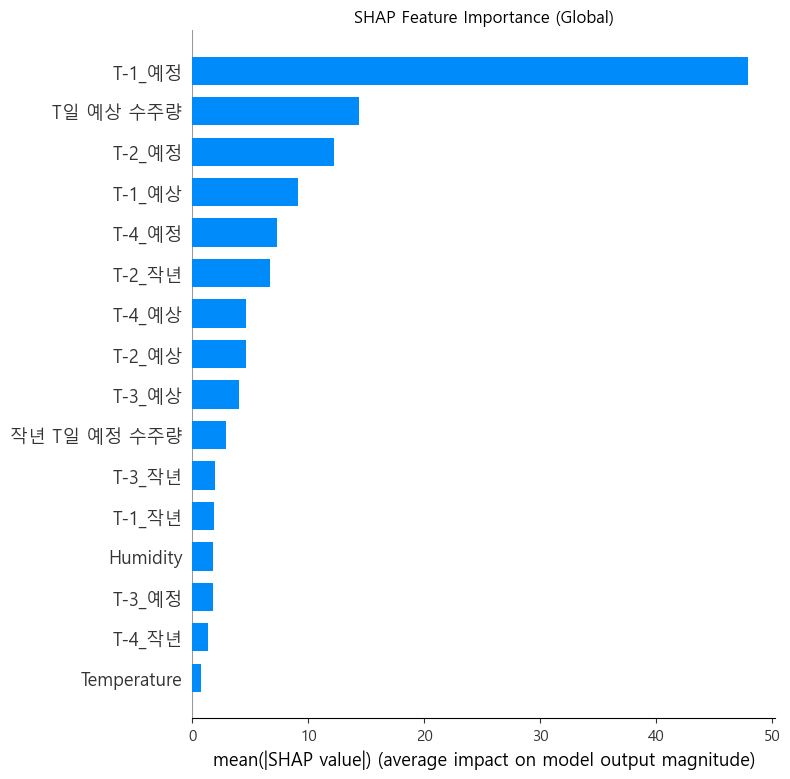

   - SHAP Beeswarm Plot 표시 및 저장 중 -> image/shap_summary_beeswarm.png


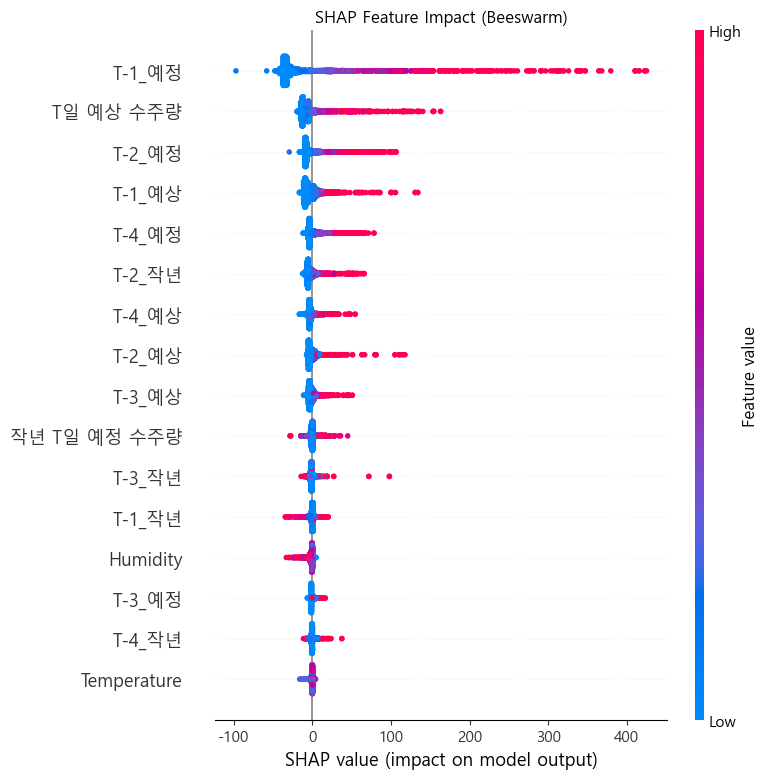

   - SHAP Force Plot (HTML) 저장 및 표시 중 -> image/shap_force_plot_instance_0.html


✅ SHAP 분석 및 결과 저장/출력 완료!

--- [SFO 프로젝트 [4/4] - SHAP 분석 종료] ---


In [37]:
# --- 3. X_val 데이터셋 재생성 ---
print("\n--- [3. X_val 데이터셋 재생성] ---")
if df_manual_features_encoded is not None:
    try:
        # 2번 스크립트의 분할 로직과 동일하게 X_val을 다시 만듭니다.
        split_idx = int(len(df_manual_features_encoded) * train_ratio)
        val_df = df_manual_features_encoded.iloc[split_idx:]
        
        X_val = val_df.drop(columns=features_to_exclude_from_X)
        y_val = val_df[target_column] 
        
        print(f"✅ X_val 재생성 완료 (shape: {X_val.shape})")
        
    except Exception as e:
        print(f"🚨 3단계 X_val 생성 중 오류 (제외할 컬럼명이 정확한지 확인하세요): {e}")
        X_val = None
else:
    print("🚨 2단계 데이터 로드 실패로 X_val 생성을 건너뜁니다.")


# --- 4. SHAP 분석 (저장 + IPYNB 출력) ---
print("\n--- [4. SHAP 분석 시작] ---")
if final_model is not None and X_val is not None:
    try:
        print("   - SHAP TreeExplainer 생성 중...")
        explainer = shap.TreeExplainer(final_model)

        print("   - SHAP 값 계산 중 (X_val)...")
        shap_values = explainer.shap_values(X_val)
        print("   - SHAP 값 계산 완료.")

        # 3. [글로벌] 피처 중요도 Bar Plot (저장 + 출력)
        print(f"   - SHAP Bar Plot 표시 및 저장 중 -> {SHAP_BAR_PATH}")
        plt.figure()
        plt.title("SHAP Feature Importance (Global)")
        shap.summary_plot(shap_values, X_val, plot_type="bar", show=False) # show=False로 자동 출력 방지
        plt.savefig(SHAP_BAR_PATH, bbox_inches='tight') # 1. 파일로 저장
        plt.show() # 2. IPYNB에 명시적으로 출력
        plt.close() # 리소스 정리

        # 4. [글로벌] 피처 영향력 Beeswarm Plot (저장 + 출력)
        print(f"   - SHAP Beeswarm Plot 표시 및 저장 중 -> {SHAP_BEESWARM_PATH}")
        plt.figure()
        plt.title("SHAP Feature Impact (Beeswarm)")
        shap.summary_plot(shap_values, X_val, show=False) # show=False로 자동 출력 방지
        plt.savefig(SHAP_BEESWARM_PATH, bbox_inches='tight') # 1. 파일로 저장
        plt.show() # 2. IPYNB에 명시적으로 출력
        plt.close() # 리소스 정리
        
        # 5. [로컬] 특정 샘플(0번째) Force Plot (저장 + 출력)
        print(f"   - SHAP Force Plot (HTML) 저장 및 표시 중 -> {SHAP_FORCE_HTML_PATH}")
        i = 0 # 0번째 샘플 분석
        force_plot = shap.force_plot(explainer.expected_value,
                                     shap_values[i,:],
                                     X_val.iloc[i,:],
                                     matplotlib=False)
        
        shap.save_html(SHAP_FORCE_HTML_PATH, force_plot) # 1. HTML 파일로 저장
        
        # 2. IPYNB에 인터랙티브 플롯 출력
        display(force_plot) 

        print("✅ SHAP 분석 및 결과 저장/출력 완료!")

    except Exception as e:
        print(f"🚨 4단계 SHAP 분석 중 오류 발생: {e}")
else:
    print("🚨 모델 또는 X_val 데이터가 준비되지 않아 SHAP 분석을 건너뜁니다.")

print("\n--- [SFO 프로젝트 [4/4] - SHAP 분석 종료] ---")


--- [5. 추가 SHAP 시각화 시작] ---

--- [5.1. Dependence Plot (Feature Interaction)] ---
🚨 경고: 'lag_1_수주량' 피처를 찾을 수 없습니다. X_val.columns[0]인 '작년 T일 예정 수주량'로 대체합니다.
   - '작년 T일 예정 수주량'의 Dependence Plot 표시 및 저장...


<Figure size 640x480 with 0 Axes>

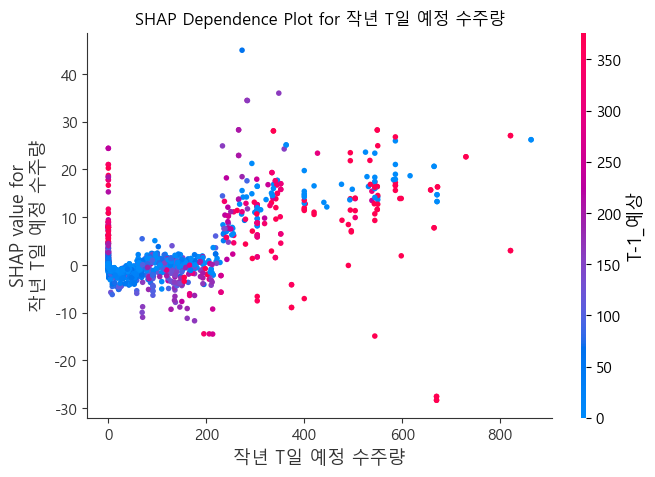


--- [5.2. Waterfall Plot (Single Instance)] ---
   - 0번째 샘플의 Waterfall Plot 표시 및 저장...


Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


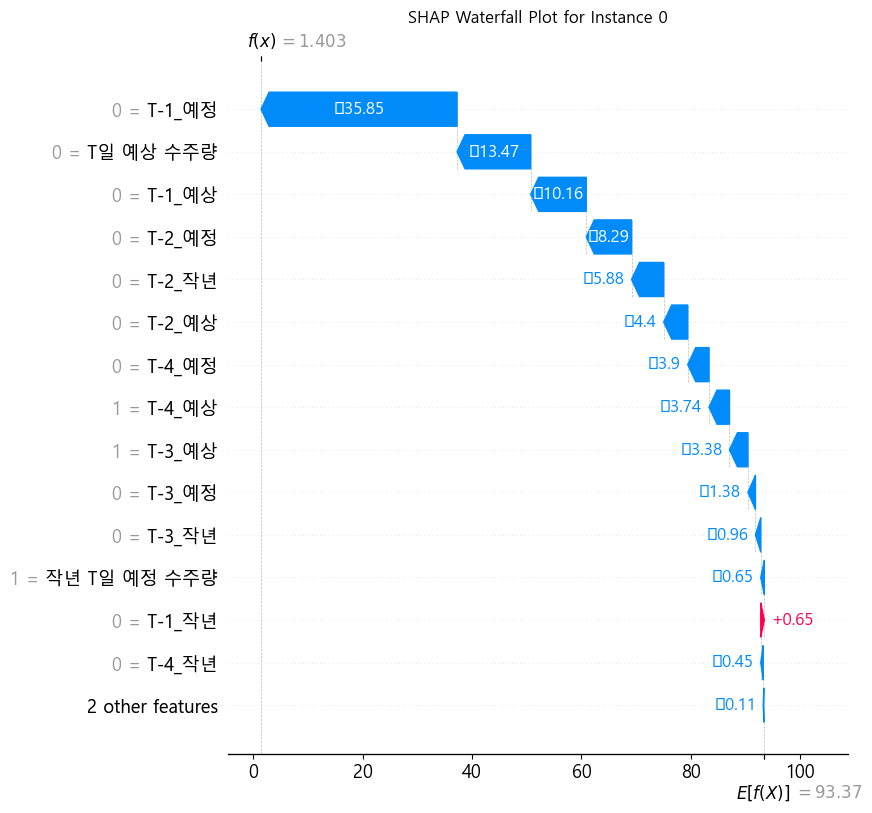


--- [5.3. Global Force Plot (Multiple Instances)] ---
   - 500개 샘플 재계산...
   - 500개 샘플의 Global Force Plot (HTML) 저장 및 표시...



--- [5. 추가 SHAP 시각화 완료] ---


In [38]:
# %% [markdown]
# ## 🚀 5. 추가 SHAP 시각화 (Dependence, Waterfall, Global Force Plot)
#
# # 이 셀은 4단계에서 'explainer', 'shap_values', 'X_val'이
# # 성공적으로 생성되었다고 가정하고 실행합니다.
#
# # 필요한 라이브러리가 이미 임포트되었는지 확인
# import matplotlib.pyplot as plt
# import numpy as np
# from IPython.display import display, HTML

# %%
print("\n--- [5. 추가 SHAP 시각화 시작] ---")

if 'final_model' not in locals() or 'X_val' not in locals() or 'shap_values' not in locals():
    print("🚨 오류: 'final_model', 'X_val', 'shap_values' 변수가 메모리에 없습니다.")
    print("   이전 단계(04_...)를 먼저 실행해야 합니다.")
else:
    # --- 5.1. Dependence Plot (특정 피처와 상호작용) ---
    print("\n--- [5.1. Dependence Plot (Feature Interaction)] ---")
    
    # 분석할 피처 (가장 중요한 피처를 선택하는 것이 좋습니다)
    # X_val.columns[0]은 예시이며, 'lag_1_수주량' 등 중요 피처로 변경하세요.
    feature_to_plot = 'lag_1_수주량' 
    
    if feature_to_plot not in X_val.columns:
        print(f"🚨 경고: '{feature_to_plot}' 피처를 찾을 수 없습니다. X_val.columns[0]인 '{X_val.columns[0]}'로 대체합니다.")
        feature_to_plot = X_val.columns[0]
            
    try:
        print(f"   - '{feature_to_plot}'의 Dependence Plot 표시 및 저장...")
        plt.figure()
        # interaction_index="auto"가 자동으로 가장 강한 상호작용 피처를 찾아 색상으로 표시
        shap.dependence_plot(
            feature_to_plot,
            shap_values,
            X_val,
            interaction_index="auto", # ⭐️ 자동 상호작용 탐지
            show=False
        )
        plt.title(f"SHAP Dependence Plot for {feature_to_plot}")
        plt.savefig("shap_dependence_plot.png", bbox_inches='tight') # 1. 파일 저장
        plt.show() # 2. IPYNB 출력
        plt.close()
    except Exception as e:
        print(f"   - Dependence Plot 생성 중 오류: {e}")


    # --- 5.2. Waterfall Plot (단일 예측의 기여도 폭포) ---
    print("\n--- [5.2. Waterfall Plot (Single Instance)] ---")
    try:
        i = 0 # 0번째 샘플 (force_plot과 동일)
        print(f"   - {i}번째 샘플의 Waterfall Plot 표시 및 저장...")
        
        # TreeExplainer의 expected_value는 종종 배열일 수 있으므로 [0]으로 접근
        base_value = explainer.expected_value
        if isinstance(base_value, (np.ndarray, list)):
            base_value = base_value[0]
            
        plt.figure()
        # shap.Explanation 객체를 사용하는 것이 최신 방식
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values[i,:],
                base_values=base_value,
                data=X_val.iloc[i,:],
                feature_names=X_val.columns.tolist()
            ),
            max_display=15, # 상위 15개 피처만 표시
            show=False
        )
        plt.title(f"SHAP Waterfall Plot for Instance {i}")
        plt.savefig("shap_waterfall_plot.png", bbox_inches='tight') # 1. 파일 저장
        plt.show() # 2. IPYNB 출력
        plt.close()
    except Exception as e:
        print(f"   - Waterfall Plot 생성 중 오류: {e}")


    # --- 5.3. Global Force Plot (전체 데이터셋 요약) ---
    print("\n--- [5.3. Global Force Plot (Multiple Instances)] ---")
    try:
        # X_val 전체(2125개)는 너무 많아 브라우저가 느려질 수 있으므로 500개만 샘플링
        sample_size = 500
        if len(X_val) > sample_size:
            # .index를 사용하여 shap_values와 X_val의 인덱스를 동일하게 맞춥니다.
            sample_indices = np.random.choice(X_val.index, sample_size, replace=False)
            X_val_sample = X_val.loc[sample_indices]
            # shap_values는 X_val의 iloc(0-based)이 아닌, 원본 loc(index)에 매칭해야 함
            # X_val이 0부터 순차적 인덱스를 가진다고 가정 (이전 코드에서 reset_index()를 했다면)
            # 만약 X_val이 원본 df의 인덱스를 유지한다면, X_val.index.get_loc(idx) 등을 사용해야 함
            # 여기서는 X_val이 0, 1, 2... 순서를 가진다고 가정 (가장 일반적)
            # --> 더 안전한 방법: explainer.shap_values(X_val_sample)을 다시 계산
            # (계산 속도가 빠르므로 재계산이 더 안전합니다)
            
            print(f"   - {sample_size}개 샘플 재계산...")
            shap_values_sample = explainer.shap_values(X_val_sample)
            
        else:
            X_val_sample = X_val
            shap_values_sample = shap_values

        print(f"   - {len(X_val_sample)}개 샘플의 Global Force Plot (HTML) 저장 및 표시...")

        # TreeExplainer의 expected_value는 종종 배열일 수 있으므로 [0]으로 접근
        base_value = explainer.expected_value
        if isinstance(base_value, (np.ndarray, list)):
            base_value = base_value[0]

        global_force_plot = shap.force_plot(
            base_value,
            shap_values_sample,
            X_val_sample,
            matplotlib=False
        )
        
        # 1. HTML 파일로 저장
        shap.save_html("shap_global_force_plot.html", global_force_plot)
        
        # 2. IPYNB에 인터랙티브 플롯 출력
        display(global_force_plot)

    except Exception as e:
        print(f"   - Global Force Plot 생성 중 오류: {e}")

print("\n--- [5. 추가 SHAP 시각화 완료] ---")